# Importing the necessary packages

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('C:/Users/madin/OneDrive/Desktop/MONISH/cyber/dataset_sdn.csv')

In [3]:
df

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,1,15209,12720,1,1.0,2.0,0
104341,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,3,15099,14693,1,1.0,2.0,0
104342,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,2,3409,3731,0,0.0,0.0,0
104343,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,1,15209,12720,1,1.0,2.0,0


In [4]:
df.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [5]:
df.tail()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
104340,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,1,15209,12720,1,1.0,2.0,0
104341,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,3,15099,14693,1,1.0,2.0,0
104342,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,2,3409,3731,0,0.0,0.0,0
104343,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,1,15209,12720,1,1.0,2.0,0
104344,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,3,15099,14693,1,1.0,2.0,0


In [6]:
df.shape

(104345, 23)

In [7]:
df.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,103839.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,4.716150e+06,212.210676,0.600987,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,2007.578742,0.390857
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,7.560116e+06,246.855123,0.489698,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,3144.437173,0.487945
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,-1.464426e+08,-4365.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,2.842000e+03,0.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,5.521680e+05,276.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,4.000000,0.000000
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,9.728112e+06,333.000000,1.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.495387e+07,639.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


In [8]:
to_drop = ['dt']
df = df.drop(to_drop, axis='columns')
df = df[df['pktrate'] !=0]

In [9]:
df['src'] = [int(i.split('.')[3]) for i in df['src']]#extracting the last two digits
df['dst'] = [int(i.split('.')[3])for i in df['dst']]#extracting the last two digits
df['switch'] = df['switch'].astype(str) 
df['src'] = df['src'].astype(str)
df['dst'] = df['dst'].astype(str)
df['port_no'] = df['port_no'].astype(str)
df['Protocol'] = df['Protocol'].astype(str)

In [10]:
new_df = pd.get_dummies(df,columns = ['switch','src','Protocol','dst','port_no'])
new_df

,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,...,dst_5,dst_6,dst_7,dst_8,dst_9,port_no_1,port_no_2,port_no_3,port_no_4,port_no_5
0,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,14428310,451,...,0,0,0,1,0,0,0,1,0,0
1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,14424046,451,...,0,0,0,1,0,0,0,0,1,0
2,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,...,0,0,0,1,0,1,0,0,0,0
3,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,...,0,0,0,1,0,0,1,0,0,0
4,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104130,910,89180,931,540000000,9.320000e+11,5,3443,30,2940,1,...,0,0,0,0,0,0,1,0,0,0
104131,910,89180,931,540000000,9.320000e+11,5,3443,30,2940,1,...,0,0,0,0,0,1,0,0,0,0
104342,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,...,1,0,0,0,0,0,1,0,0,0
104343,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,...,1,0,0,0,0,1,0,0,0,0


In [11]:
df.isnull().sum()

switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        463
tot_kbps       463
label            0
dtype: int64

<Axes: xlabel='label', ylabel='count'>

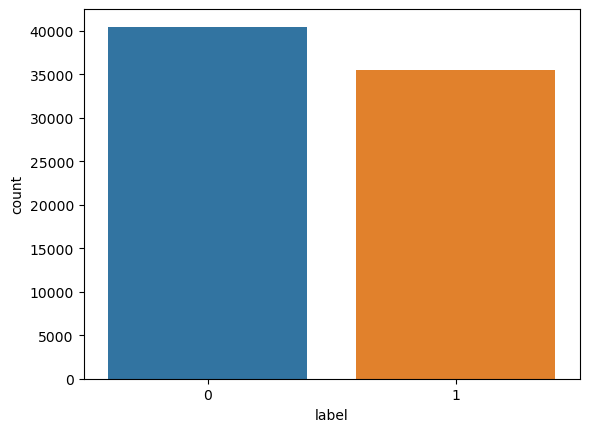

In [12]:
import seaborn as sns
sns.countplot(x = df['label'],data = new_df)

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
Le=LabelEncoder()
df['Protocol']=Le.fit_transform(df['Protocol'])
df['rx_kbps']=Le.fit_transform(df['rx_kbps'])
df['tot_kbps']=Le.fit_transform(df['tot_kbps'])

In [15]:
df.isnull().sum()

switch         0
src            0
dst            0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64

In [16]:
#df.to_csv('final.csv')

In [17]:
x=df.drop(['label'],axis=1)
y=df.label

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [19]:
x.iloc[369]

switch                      1
src                         1
dst                         8
pktcount               135036
bytecount           143948376
dur                       310
dur_nsec            738000000
tot_dur        311000000000.0
flows                       2
packetins                1943
pktperflow               8641
byteperflow           9211306
pktrate                   288
Pairflow                    0
Protocol                    2
port_no                     4
tx_bytes                 3842
rx_bytes                 3590
tx_kbps                     0
rx_kbps                     0
tot_kbps                    0
Name: 403, dtype: object

In [20]:
y.iloc[369]

1

In [21]:
x_train.columns

Index(['switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur', 'dur_nsec',
       'tot_dur', 'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow', 'Protocol', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps',
       'rx_kbps', 'tot_kbps'],
      dtype='object')

In [22]:
x.loc[1]

switch                      1
src                         1
dst                         8
pktcount               126395
bytecount           134737070
dur                       280
dur_nsec            734000000
tot_dur        281000000000.0
flows                       2
packetins                1943
pktperflow              13531
byteperflow          14424046
pktrate                   451
Pairflow                    0
Protocol                    2
port_no                     4
tx_bytes                 3842
rx_bytes                 3520
tx_kbps                     0
rx_kbps                     0
tot_kbps                    0
Name: 1, dtype: object

In [23]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [24]:
def show_confusion_matrix(model,data,label,pred_label):
    class_names=['Normal','Attack']
    #print(plot_confusion_matrix(model, data,label,display_labels=class_names,cmap=plt.cm.Blues,normalize='true'))
    plt.title('Confusion Matrix')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    print('\n')
    print(classification_report(label, pred_label))
    print(confusion_matrix(label,pred_label))
    print('\n')

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [26]:
y_p=log.predict(x_test)
score=accuracy_score(y_test,y_p)
print(score)

0.7564136297855545


In [27]:
clf=classification_report(y_test,y_p)
print(clf)

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      8035
           1       0.74      0.74      0.74      7167

    accuracy                           0.76     15202
   macro avg       0.76      0.76      0.76     15202
weighted avg       0.76      0.76      0.76     15202



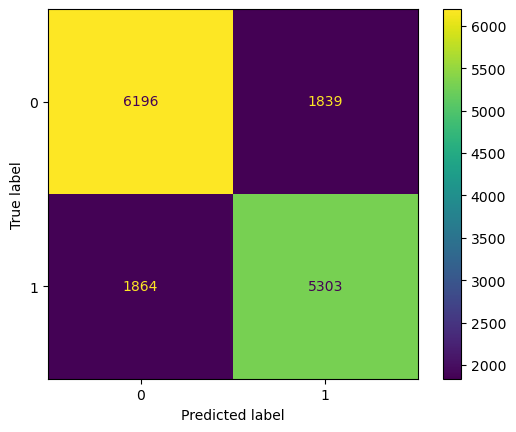

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_p)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier
rand=RandomForestClassifier()
rand.fit(x_train,y_train)

RandomForestClassifier()

In [30]:
y_pred=rand.predict(x_test)
y_score=accuracy_score(y_test,y_pred)# to check accuracy
print(y_score)

1.0


In [31]:
clf=classification_report(y_test,y_pred)
print(clf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8035
           1       1.00      1.00      1.00      7167

    accuracy                           1.00     15202
   macro avg       1.00      1.00      1.00     15202
weighted avg       1.00      1.00      1.00     15202



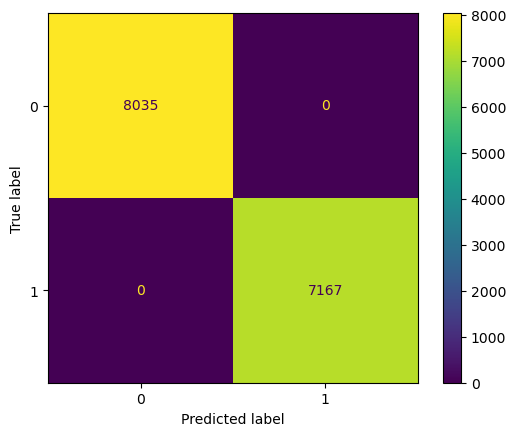

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

In [33]:
from sklearn import tree

In [34]:
decision_tree = tree.DecisionTreeClassifier(random_state=456)
decision_tree = decision_tree.fit(x_train,y_train)

In [35]:
predic=decision_tree.predict(x_test)

In [36]:
acc2=accuracy_score(predic,y_test)
acc2

1.0

In [37]:
clf=classification_report(predic,y_test)
print(clf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8035
           1       1.00      1.00      1.00      7167

    accuracy                           1.00     15202
   macro avg       1.00      1.00      1.00     15202
weighted avg       1.00      1.00      1.00     15202



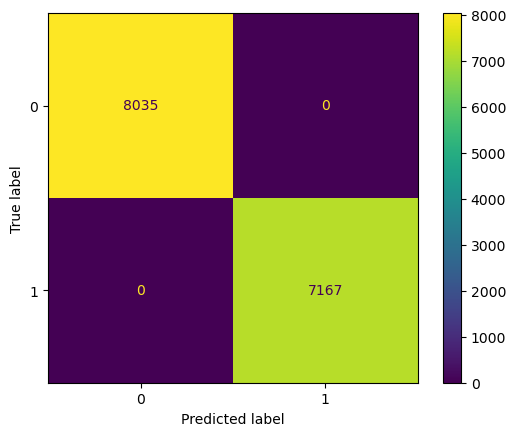

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predic)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

In [39]:
 from sklearn.ensemble import AdaBoostClassifier

In [40]:
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

# Train Adaboost Classifer
model1 = abc.fit(x_train,y_train)


#Predict the response for test dataset
y_pred = model1.predict(x_test)

In [41]:
x_train[1]

array([ 1.44057939, -0.13664617,  1.91109898, -0.93066425, -0.97030305,
       -0.93658786,  1.45264719, -0.93467368, -0.09561448,  1.01118082,
       -0.05163851, -0.73037238, -0.05034338,  0.89022506, -0.23386785,
       -1.22982118, -0.55950741, -0.65642601, -0.42589124, -0.63857295,
       -0.80930034])

In [42]:
y_pred[1]

1

In [43]:
acc3=accuracy_score(y_pred,y_test)
acc3

0.9940139455334824

In [44]:
clf=classification_report(y_pred,y_test)
print(clf)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8042
           1       0.99      0.99      0.99      7160

    accuracy                           0.99     15202
   macro avg       0.99      0.99      0.99     15202
weighted avg       0.99      0.99      0.99     15202



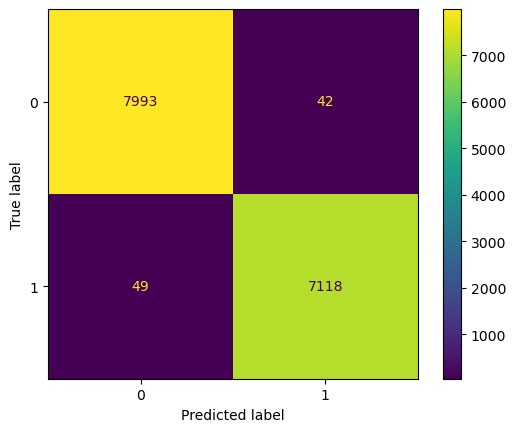

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

In [46]:
from sklearn import svm
cla = svm.LinearSVC(random_state=11)
cla.fit(x_train,y_train)
predic1=cla.predict(x_test)
acc5 = accuracy_score(predic1,y_test)
acc5

0.7549664517826602

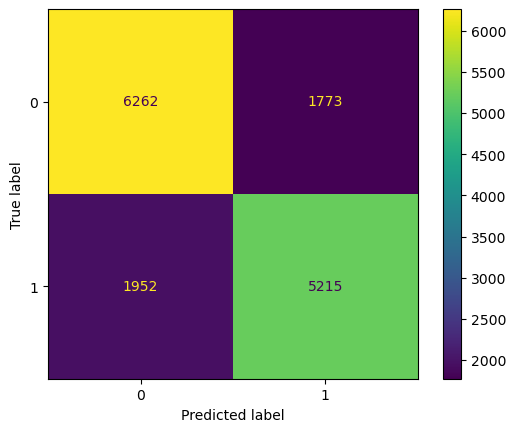

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predic1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

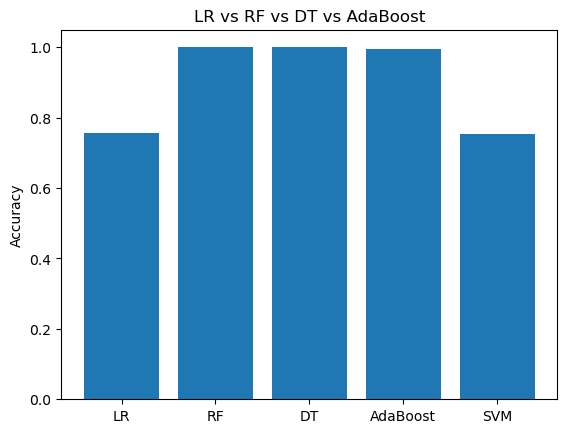

In [48]:
import matplotlib.pyplot as plt; plt.rcdefaults()

objects = ('LR','RF','DT','AdaBoost','SVM')
y_pos = np.arange(len(objects))
performance = [score,y_score,acc2,acc3,acc5]

plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('LR vs RF vs DT vs AdaBoost')

plt.show()

# Testing the models

In [49]:
test=abc.predict(np.array([[1,1,8,135036,143948376,310,738000000,311000000000,2,1943,8641,9211306,288,0,2,3,4850,
                            371009240,0,1318,1418]]))
print(test)
if test[0]==1:
    print("cyber attack detected")
else:
    print("cyber attack not Detected")

[0]
cyber attack not Detected


In [50]:
test=abc.predict(np.array([[1.44057939, -0.13664617,  1.91109898, -0.93066425, -0.97030305,
       -0.93658786,  1.45264719, -0.93467368, -0.09561448,  1.01118082,
       -0.05163851, -0.73037238, -0.05034338,  0.89022506, -0.23386785,
       -1.22982118, -0.55950741, -0.65642601, -0.42589124, -0.63857295,
       -0.80930034]]))
print(test)
if test[0]==1:
    print("cyber attack detected")
else:
    print("cyber attack not Detected")

[1]
cyber attack detected
